### Adaboost(아다부스트)
- adaptive + boosting
- 간단한 약분류기(weak classifier)들이 상호보완 하도록 단계적으로 학습하며, 이들을 조합하여 최종 강분류기(strong classifier)의 성능을 증폭
- 먼저 학습된 분류기가 잘못 분류한 결과 정보를 다음 분류기의 학습 시 사용하여 이전 분류기의 단점을 보완
- 이전 분류기가 오분류한 샘플의 가중치를 바꾸어 가며 잘못 분류되는 데이터에 더 집중하여 분류할 수 있도록 함.
- 최종 분류기(strong classifier)는 개별 약분류기(weak classifier)들에 각각 가중치를 적용, 조합하여 얻을 수 있다.

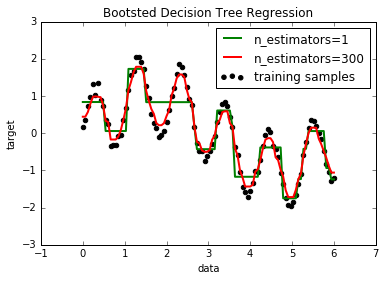

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
%matplotlib inline

# dataset create
rng = np.random.RandomState(1)
X = np.linspace(0,6,100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6*X).ravel()+rng.normal(0,0.1, X.shape[0])

# fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng)

regr_1.fit(X,y)
regr_2.fit(X,y)

# predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

plt.figure()
plt.scatter(X,y, c="k", label="training samples")
plt.plot(X,y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X,y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Bootsted Decision Tree Regression")
plt.legend()
plt.show()